In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis

In [42]:
fuel_data = pd.read_csv("https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv") 
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [43]:
 fuel_data.groupby("report_year").mean()

,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,,
1994,106.120648,2.724018e+06,10.638098,213.191996,63.636060,3.086977
1995,110.139051,3.712067e+06,10.644830,354.422555,32.735269,2.868838
1996,108.714154,2.544754e+06,10.778041,79.434995,9196.705948,2.695880
1997,108.366545,2.813503e+06,10.247632,149.482132,11140.197239,3.113486
1998,109.845528,3.267453e+06,10.704964,126.683519,287.154420,2.775862
1999,108.222857,3.281281e+06,10.558885,120.053605,25.551627,2.740251
2000,111.083758,2.472032e+06,9.224475,237.797111,985.362877,4.208403
2001,113.521386,2.321402e+06,8.371469,133.013010,60.050396,4.612658
2002,120.354357,2.145645e+06,8.304833,101.179365,47.594361,6.226281


In [44]:
fuel_data.describe() # describe the dataset

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [ ]:
fuel_data.info() # data info shows fuel _unit has some missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [ ]:
fuel_data.isnull().any() # check if any null/missing data

record_id                       False
utility_id_ferc1                False
report_year                     False
plant_name_ferc1                False
fuel_type_code_pudl             False
fuel_unit                        True
fuel_qty_burned                 False
fuel_mmbtu_per_unit             False
fuel_cost_per_unit_burned       False
fuel_cost_per_unit_delivered    False
fuel_cost_per_mmbtu             False
dtype: bool

In [51]:
fuel_data.isnull().sum() # check the number of missing values

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [52]:
percent = (180/29523) *100 #percentage of missing data
percent

0.609694136774718

In [53]:
fuel_data = fuel_data.dropna()

In [ ]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29343 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29343 non-null  object 
 1   utility_id_ferc1              29343 non-null  int64  
 2   report_year                   29343 non-null  int64  
 3   plant_name_ferc1              29343 non-null  object 
 4   fuel_type_code_pudl           29343 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29343 non-null  float64
 7   fuel_mmbtu_per_unit           29343 non-null  float64
 8   fuel_cost_per_unit_burned     29343 non-null  float64
 9   fuel_cost_per_unit_delivered  29343 non-null  float64
 10  fuel_cost_per_mmbtu           29343 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.7+ MB


In [ ]:
fuel_data.isnull().any()  #just to confirm

record_id                       False
utility_id_ferc1                False
report_year                     False
plant_name_ferc1                False
fuel_type_code_pudl             False
fuel_unit                       False
fuel_qty_burned                 False
fuel_mmbtu_per_unit             False
fuel_cost_per_unit_burned       False
fuel_cost_per_unit_delivered    False
fuel_cost_per_mmbtu             False
dtype: bool

In [15]:
x = fuel_data["fuel_mmbtu_per_unit"]

In [36]:
np.percentile(x, 75)

17.006

In [38]:
import statistics

In [40]:
np.std(x)

10.600040781504145

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


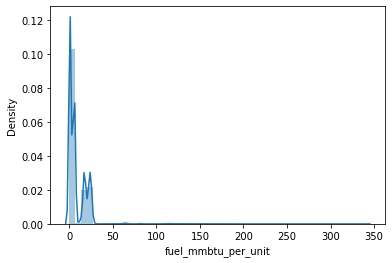

In [45]:
sns.distplot(x, kde =True)

In [19]:
fuel_burned = fuel_data["fuel_qty_burned" ]

In [28]:
skew(fuel_burned, bias = False)

15.8514954691095

In [33]:
kurtosis(fuel_burned, bias = False)

651.3694501337731

In [47]:
dat = fuel_data.groupby("fuel_type_code_pudl").mean()
dat

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,
coal,115.637534,2004.623143,1.903473e+06,20.762780,67.421830,116.951141,1.787190
gas,124.122062,2005.978060,4.843183e+06,1.021913,13.659397,12.095172,5.408876
nuclear,107.397311,2002.970660,5.454838e+06,17.582120,4955.157002,28616.915039,1.716559
oil,113.236235,2007.195933,6.311677e+04,5.814377,168.877086,313.907691,12.698732
other,110.467066,2001.700599,2.948137e+06,0.572752,18.253856,16.871485,155.084910
waste,154.253968,2005.650794,1.171914e+05,0.341163,19.518122,18.413052,822.709937


In [50]:
dat["fuel_cost_per_unit_burned"].min()

13.659396569737135